In [5]:
!pip install yfinance pandas matplotlib seaborn plotly streamlit scikit-learn




[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


^C
Note: you may need to restart the kernel to use updated packages.


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/b2/3b/47b5eaee01ef2b5a80ba3f7f6ecf79587cb458690857d4777bfd77371c6f/scikit_learn-1.7.1-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.7.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for scipy>=1.8.0 from https://files.pythonhosted.org/packages/c4/94/994369978509f227cba7dfb9e623254d0d5559506fe994aef4bea3ed469c/scipy-1.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached scipy-1.16.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/7d/4f/1195bbac8e0c2acc5f740661631d8d750dc38d4a32b23ee5df3cde6f4e0d/joblib-1.5.1-py3-none-any.whl.metadata
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/32/d5/f9a850d79b0851d1d4ef6456097579a9005b31fea687


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\USER\AppData\Local\Temp\ipykernel_20740\1290815798.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2019-01-01", end="2024-01-01")["Close"]
[*********************100%***********************]  3 of 3 completed


Shape: (1258, 3)
Columns: Index(['AAPL', 'MSFT', 'TSLA'], dtype='object', name='Ticker')
Ticker         AAPL         MSFT         TSLA
count   1258.000000  1258.000000  1258.000000
mean     120.548150   229.170119   170.887469
std       46.425283    72.633538   108.304521
min       33.832439    91.452644    11.931333
25%       74.758024   166.187759    49.886168
50%      131.544197   236.749298   200.313332
75%      156.884731   285.157394   251.844997
max      196.446823   378.404633   409.970001


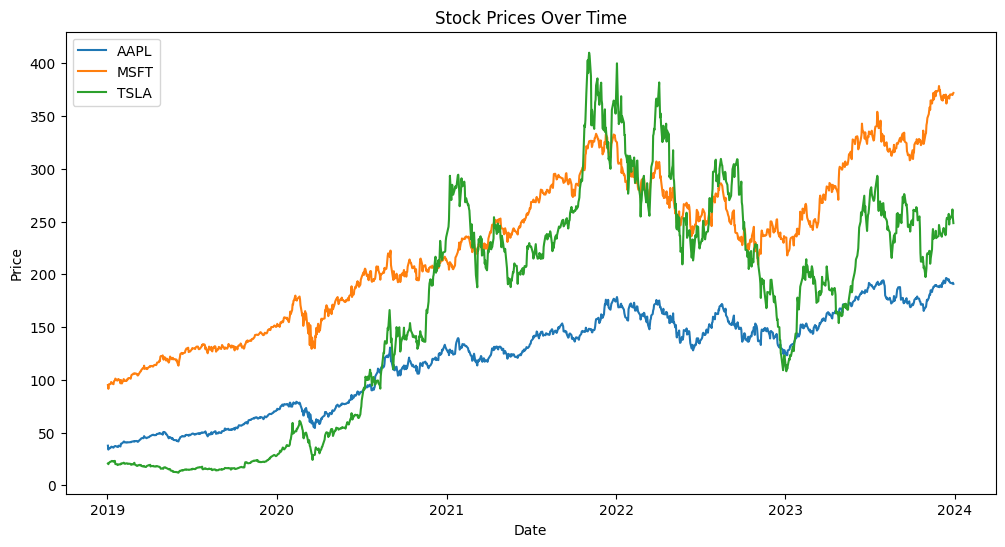

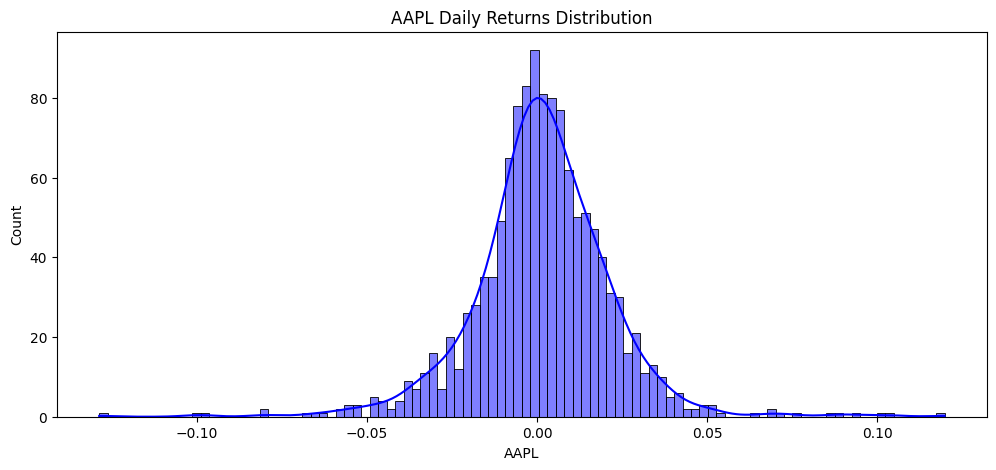

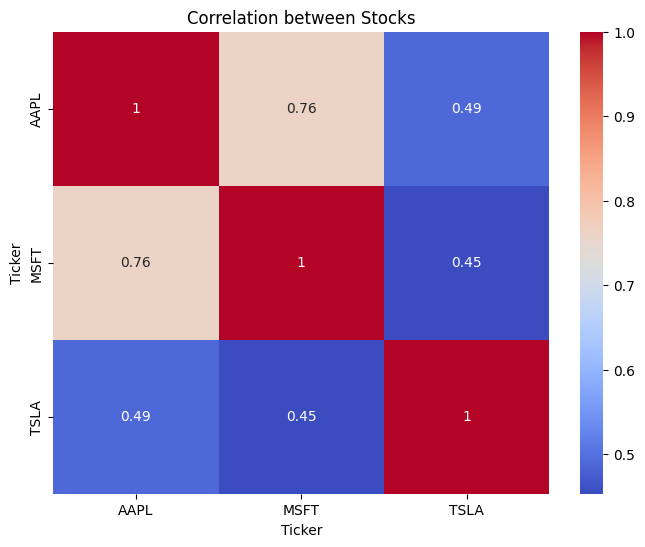

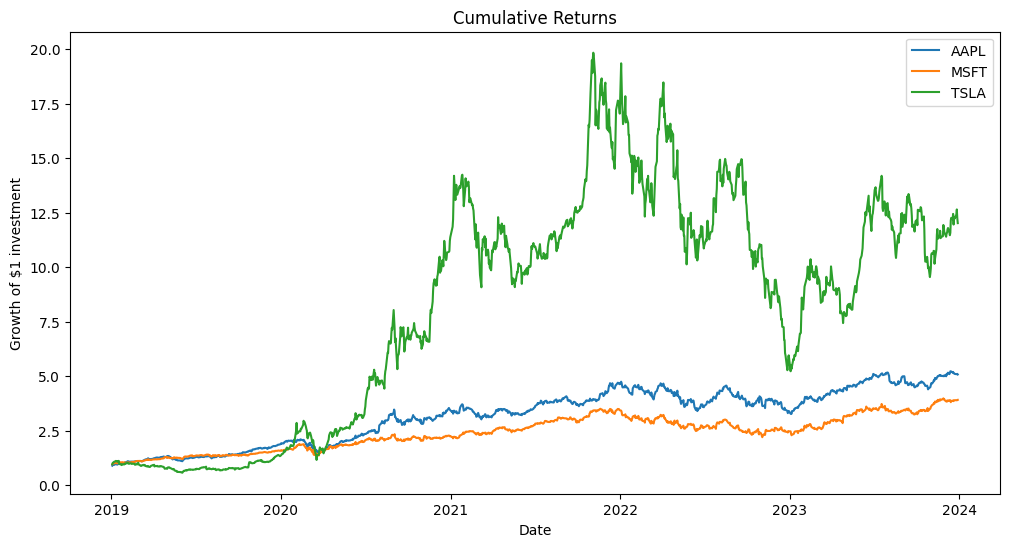

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

tickers = ["AAPL", "TSLA", "MSFT"]

data = yf.download(tickers, start="2019-01-01", end="2024-01-01")["Close"]
data.head()

print("Shape:", data.shape)
print("Columns:", data.columns)

print(data.describe())

plt.figure(figsize=(12,6))
for col in data.columns:
    plt.plot(data.index, data[col], label=col)
plt.title("Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

returns = data.pct_change().dropna()

plt.figure(figsize=(12,5))
sns.histplot(returns["AAPL"], bins=100, kde=True, color="blue")
plt.title("AAPL Daily Returns Distribution")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(returns.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Stocks")
plt.show()

cumulative_returns = (1 + returns).cumprod()

plt.figure(figsize=(12,6))
for col in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[col], label=col)
plt.title("Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Growth of $1 investment")
plt.legend()
plt.show()


MSE: 26603.708576507117
R2 Score: -13.721553972295215


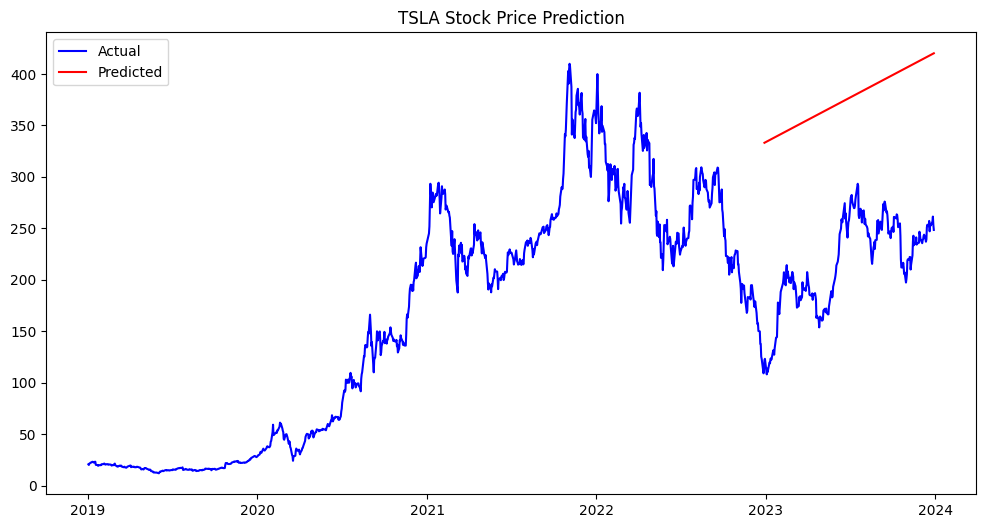

In [ ]:
tsla = data["TSLA"].dropna().reset_index()
tsla["Date"] = pd.to_datetime(tsla["Date"])
tsla["Days"] = (tsla["Date"] - tsla["Date"].min()).dt.days

X = tsla[["Days"]]
y = tsla["TSLA"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

plt.figure(figsize=(12,6))
plt.plot(tsla["Date"], tsla["TSLA"], label="Actual", color="blue")
plt.plot(X_test["Days"].apply(lambda x: tsla["Date"].min() + pd.Timedelta(days=x)), y_pred, label="Predicted", color="red")
plt.title("TSLA Stock Price Prediction")
plt.legend()
plt.show()

fig = px.line(data, x=data.index, y=data.columns, title="Stock Prices (Interactive)")
fig.show()


In [15]:
data.to_csv("stocks_data.csv")
returns.to_csv("returns_data.csv")
